In [2]:
import os
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
#import seaborn
import pickle

In [3]:
pwd = os.getcwd()

In [248]:
with open('trip_df.pickle', 'rb') as handle:
    trip_df = pickle.load(handle)

# Speed 

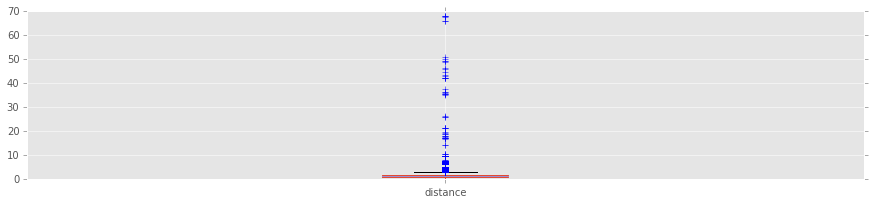

In [243]:
trip_df.boxplot(['distance'], return_type='axes')

In [244]:
trip_df[trip_df['distance']>=68]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,a4,a,distance,kph,landmark_y,dockcount_y,start_lat,start_lon,end_lat,end_lon
70821,30,12088,2013-11-16 14:07:00,Civic Center BART (7th at Market),72,2013-11-16 10:46:00,San Jose Civic Center,3,Customer,98343,...,0.000021,0.000029,68.023961,20.258625,San Jose,15,37.330698,-121.888979,37.780356,-122.412919


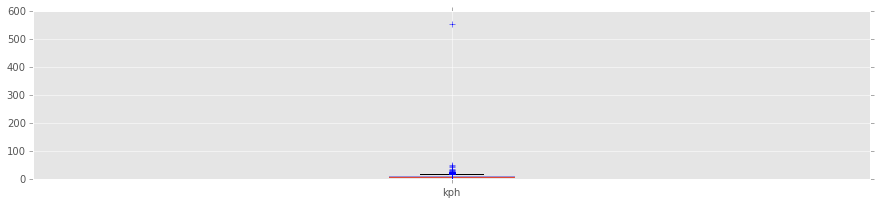

In [8]:
trip_df.boxplot(['kph'], return_type='axes')

In [9]:
# this doesn't look humanly possible, so let's remove this datapoint 
trip_df[trip_df['kph']>500]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
28563,232,236,2013-10-02 08:31:00,Civic Center BART (7th at Market),72,2013-10-02 08:27:00,Redwood City Caltrain Station,22,Subscriber,42493,...,-2.133352,0.003156,-0.005136,0.000007,0.790365,0.793501,0.000002,0.000008,36.368195,554.769073


In [10]:
trip_df = trip_df[trip_df['kph']<500]

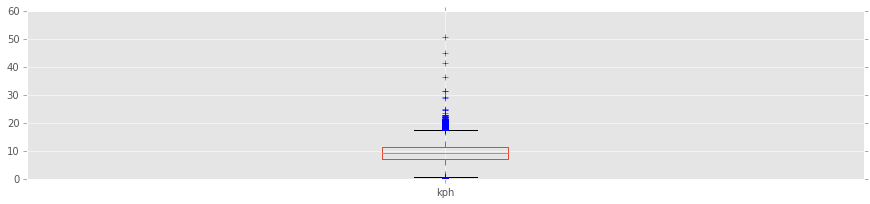

In [11]:
trip_df.boxplot(['kph'], return_type='axes')

In [12]:
trip_df[trip_df['kph']>40]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
109190,422,2525,2014-01-13 17:29:00,Redwood City Caltrain Station,22,2014-01-13 16:46:00,2nd at Townsend,61,Subscriber,151731,...,-2.136113,-0.002761,0.005139,0.000007,0.793501,0.790363,0.000002,0.000008,35.559243,50.698327
178048,705,3553,2014-07-29 19:32:00,San Francisco Caltrain (Townsend at 4th),70,2014-07-29 18:33:00,California Ave Caltrain Station,36,Subscriber,385606,...,-2.131794,0.004406,-0.006066,0.000009,0.790405,0.794106,0.000005,0.000012,44.558834,45.148270
282653,446,3237,2014-04-10 18:29:00,Redwood City Caltrain Station,22,2014-04-10 17:35:00,Commercial at Montgomery,45,Customer,244143,...,-2.136334,-0.002982,0.005378,0.000007,0.793501,0.790217,0.000002,0.000009,37.397851,41.591678


In [ ]:
# according to wikipedia 
# On a racing bicycle, a reasonably fit rider can ride at 40 km/h (25 mph) on flat ground for short periods
# meaning that we can assume that these trips were made by car (cycle transport) or the data is incorrect 


In [13]:
trip_df = trip_df[trip_df['kph']<40]

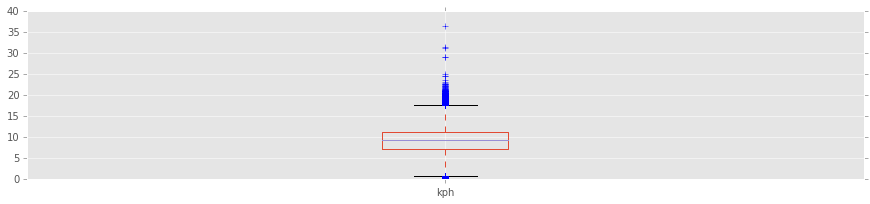

In [14]:
trip_df.boxplot(['kph'], return_type='axes')

In [15]:
# this starts to be beliavable so let's assume someone is really fit in San Fransisco
trip_df[trip_df['kph']>34]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
207899,561,246,2014-06-29 16:36:00,Townsend at 7th,65,2014-06-29 16:32:00,Embarcadero at Folsom,51,Subscriber,344040,...,-2.136127,0.000204,0.000356,3.171104e-08,0.790465,0.790246,1.039450e-08,3.820409e-08,2.488971,36.423959


In [16]:
# average speed
trip_df['kph'].mean()

8.811347383459195

# Route

In [17]:
routes = trip_df.groupby([trip_df['Start Station'], trip_df['End Station']]).count()

In [18]:
routes.reset_index(inplace=True)

In [19]:
routes['count'] = routes['Duration']

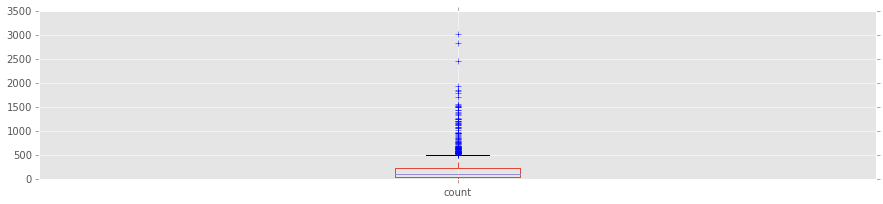

In [20]:
routes.boxplot(['count'], return_type='axes')

In [21]:
# most popular route
routes[routes['count']==routes['count'].max()]
most_popular_start = routes[routes['count']==routes['count'].max()]['Start Station']
most_popular_end = routes[routes['count']==routes['count'].max()]['End Station']

In [22]:
# average speed on the most popular route
most_popular_trips = trip_df[(trip_df['Start Station']==most_popular_start.values[0]) & (trip_df['End Station']==most_popular_end.values[0])]
most_popular_trips['kph'].mean()

7.963524459446054

In [27]:
# average trip duration on the most popular route
most_popular_trips['Duration'].mean()/60

23.738638622060286

In [23]:
most_popular_start.values[0], most_popular_end.values[0]

('Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome')

In [25]:
routes['count'].max()

3019

In [28]:
most_popular_trips['distance'].describe()

count    3.019000e+03
mean     1.309522e+00
std      8.350260e-14
min      1.309522e+00
25%      1.309522e+00
50%      1.309522e+00
75%      1.309522e+00
max      1.309522e+00
Name: distance, dtype: float64

In [30]:
# finding the fastest route on average
route_duration = trip_df.groupby([trip_df['Start Station'], trip_df['End Station']])['Duration'].mean()

In [48]:
route_duration_df = pd.DataFrame(route_duration)

In [50]:
route_duration_df.reset_index(inplace=True)

In [53]:
route_duration_df.sort('Duration').head()

,Start Station,End Station,Duration
0,Beale at Market,Temporary Transbay Terminal (Howard at Beale),134.782114
1,Commercial at Montgomery,Clay at Battery,216.052632
2,Arena Green / SAP Center,Santa Clara at Almaden,216.643098
3,Clay at Battery,Mechanics Plaza (Market at Battery),230.059880
4,Davis at Jackson,Beale at Market,244.792035


In [60]:
# converting to minuts
route_duration_df.sort('Duration')['Duration'][0]/60

2.2463685636856368

# Scatterplots by stations

In [83]:
with open('station_df.pickle', 'rb') as handle:
    station_df = pickle.load(handle)

In [96]:
san_francisco = station_df[station_df['landmark'] == 'San Francisco']
redwood_city = station_df[station_df['landmark'] == 'Redwood City']
palo_alto = station_df[station_df['landmark'] == 'Palo Alto']
mountain_view = station_df[station_df['landmark'] == 'Mountain View']
san_jose = station_df[station_df['landmark'] == 'San Jose']


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c329fd0>], dtype=object)

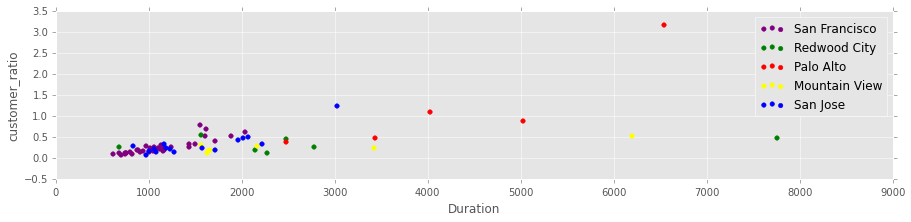

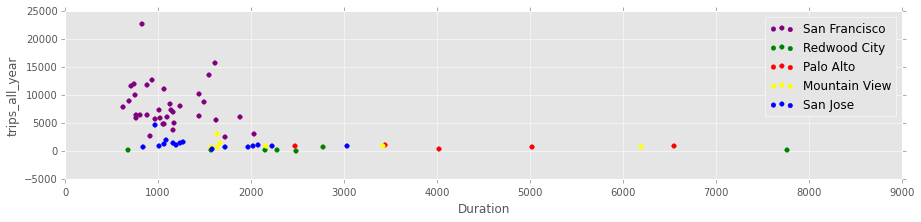

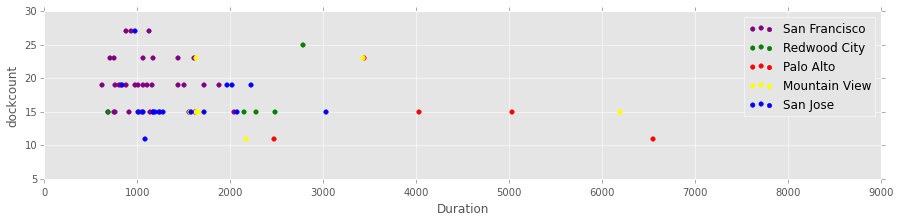

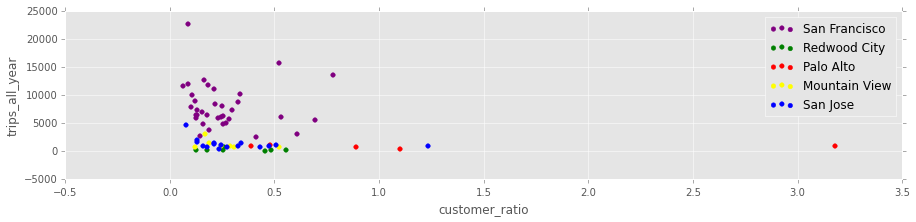

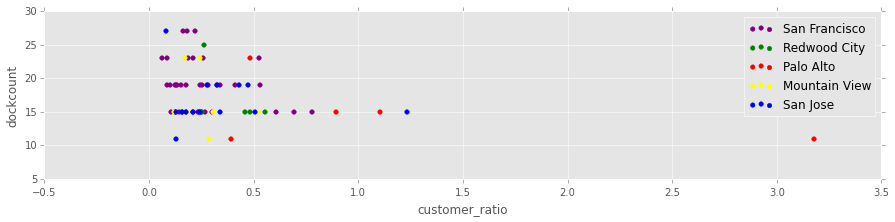

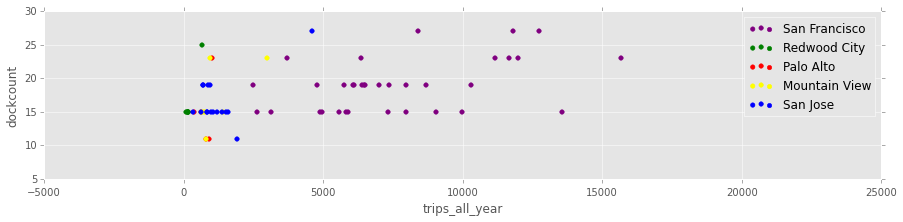

In [104]:
ax = san_francisco.plot(kind='scatter', x='Duration', y='customer_ratio', color='purple', label='San Francisco')
ax = redwood_city.plot(kind='scatter', x='Duration', y='customer_ratio', color='green', label='Redwood City', ax=ax)
ax = palo_alto.plot(kind='scatter', x='Duration', y='customer_ratio', color='red', label='Palo Alto', ax=ax)
ax = mountain_view.plot(kind='scatter', x='Duration', y='customer_ratio', color='yellow', label='Mountain View', ax=ax)
san_jose.plot(kind='scatter', x='Duration', y='customer_ratio', color='blue', label='San Jose', ax=ax, subplots=True)

bx = san_francisco.plot(kind='scatter', x='Duration', y='trips_all_year', color='purple', label='San Francisco')
bx = redwood_city.plot(kind='scatter', x='Duration', y='trips_all_year', color='green', label='Redwood City', ax=bx)
bx = palo_alto.plot(kind='scatter', x='Duration', y='trips_all_year', color='red', label='Palo Alto', ax=bx)
bx = mountain_view.plot(kind='scatter', x='Duration', y='trips_all_year', color='yellow', label='Mountain View', ax=bx)
san_jose.plot(kind='scatter', x='Duration', y='trips_all_year', color='blue', label='San Jose', ax=bx, subplots=True)

cx = san_francisco.plot(kind='scatter', x='Duration', y='dockcount', color='purple', label='San Francisco')
cx = redwood_city.plot(kind='scatter', x='Duration', y='dockcount', color='green', label='Redwood City', ax=cx)
cx = palo_alto.plot(kind='scatter', x='Duration', y='dockcount', color='red', label='Palo Alto', ax=cx)
cx = mountain_view.plot(kind='scatter', x='Duration', y='dockcount', color='yellow', label='Mountain View', ax=cx)
san_jose.plot(kind='scatter', x='Duration', y='dockcount', color='blue', label='San Jose', ax=cx, subplots=True)

dx = san_francisco.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='purple', label='San Francisco')
dx = redwood_city.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='green', label='Redwood City', ax=dx)
dx = palo_alto.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='red', label='Palo Alto', ax=dx)
dx = mountain_view.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='yellow', label='Mountain View', ax=dx)
san_jose.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='blue', label='San Jose', ax=dx, subplots=True)

ex = san_francisco.plot(kind='scatter', x='customer_ratio', y='dockcount', color='purple', label='San Francisco')
ex = redwood_city.plot(kind='scatter', x='customer_ratio', y='dockcount', color='green', label='Redwood City', ax=ex)
ex = palo_alto.plot(kind='scatter', x='customer_ratio', y='dockcount', color='red', label='Palo Alto', ax=ex)
ex = mountain_view.plot(kind='scatter', x='customer_ratio', y='dockcount', color='yellow', label='Mountain View', ax=ex)
san_jose.plot(kind='scatter', x='customer_ratio', y='dockcount', color='blue', label='San Jose', ax=ex, subplots=True)

fx = san_francisco.plot(kind='scatter', x='trips_all_year', y='dockcount', color='purple', label='San Francisco')
fx = redwood_city.plot(kind='scatter', x='trips_all_year', y='dockcount', color='green', label='Redwood City', ax=fx)
fx = palo_alto.plot(kind='scatter', x='trips_all_year', y='dockcount', color='red', label='Palo Alto', ax=fx)
fx = mountain_view.plot(kind='scatter', x='trips_all_year', y='dockcount', color='yellow', label='Mountain View', ax=fx)
san_jose.plot(kind='scatter', x='trips_all_year', y='dockcount', color='blue', label='San Jose', ax=fx, subplots=True)


# Bike usage by day

In [109]:
daily = trip_df.groupby(['day_of_week', 'Subscriber Type']).count()

In [112]:
daily = daily.unstack(level='Subscriber Type') 

In [114]:
daily = daily['Duration']

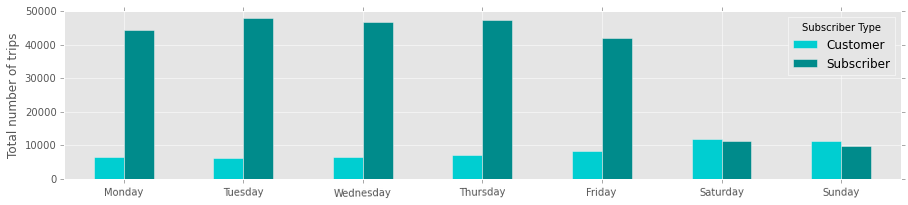

In [183]:
ax = daily.plot(kind='bar', color=['darkturquoise', 'darkcyan'])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=1)
ax.set_ylabel('Total number of trips')
ax.set_xlabel('')

# Bike usage by hour

In [128]:
trip_df['time_of_day'] = trip_df.start_date.dt.hour

In [130]:
hourly = trip_df.groupby(['time_of_day', 'Subscriber Type']).count()
hourly = hourly.unstack(level='Subscriber Type') 
hourly = hourly['Duration']

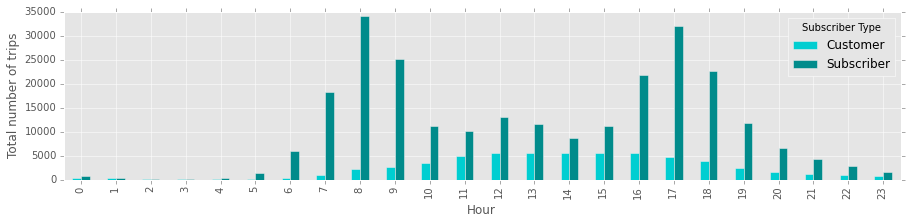

In [186]:
ax = hourly.plot(kind='bar', color=['darkturquoise', 'darkcyan'])
ax.set_ylabel('Total number of trips')
ax.set_xlabel('Hour')

drunk cyclists?

In [149]:
night_trips = trip_df[trip_df['time_of_day']<3]

In [187]:
night_trips_daily = night_trips.groupby(['day_of_week']).count()

In [189]:
night_trips_daily = night_trips_daily['Duration']

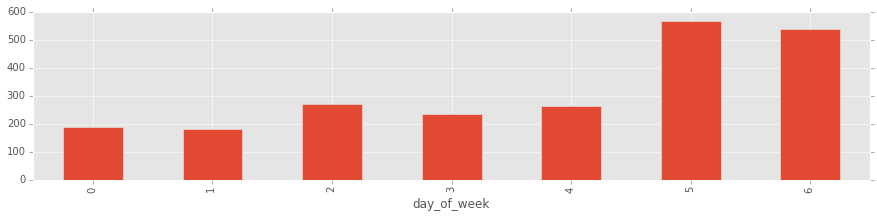

In [190]:
night_trips_daily.plot(kind='bar')

circle trip in the middle of the night? out of beer?

In [138]:
night_circles = trip_df[(trip_df['time_of_day']<3) & (trip_df['Start Terminal']==trip_df['End Terminal'])]

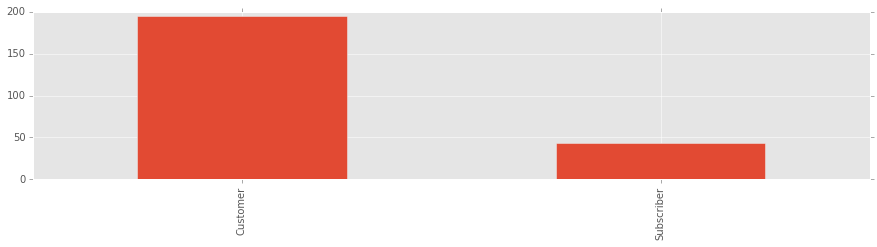

In [145]:
night_circles['Subscriber Type'].value_counts().plot(kind='bar')

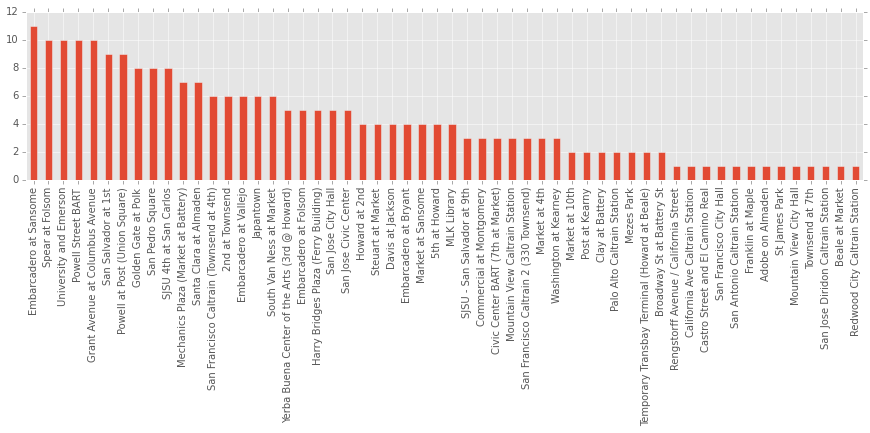

In [146]:
night_circles['Start Station'].value_counts().plot(kind='bar')

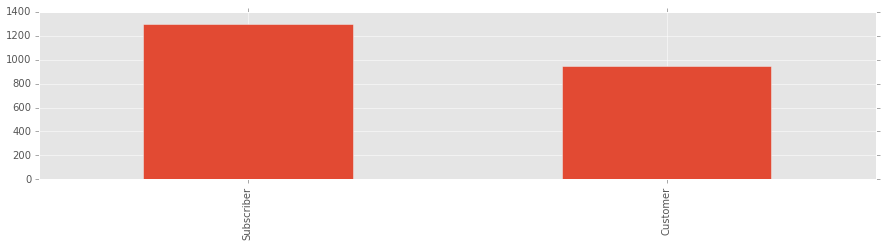

In [150]:
night_trips['Subscriber Type'].value_counts().plot(kind='bar')

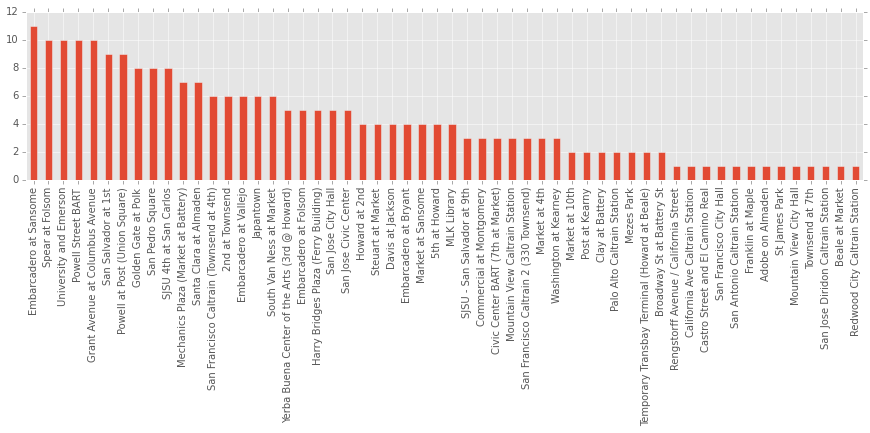

In [151]:
night_circles['Start Station'].value_counts().plot(kind='bar')

In [158]:
night = pd.DataFrame(night_circles['Subscriber Type'].value_counts())
night.columns = ['circles']

In [167]:
night['trip'] = [night_trips['Subscriber Type'].value_counts()['Customer'], night_trips['Subscriber Type'].value_counts()['Subscriber']]
night['not_cricle_trips'] = night['trip'] - night['circles']

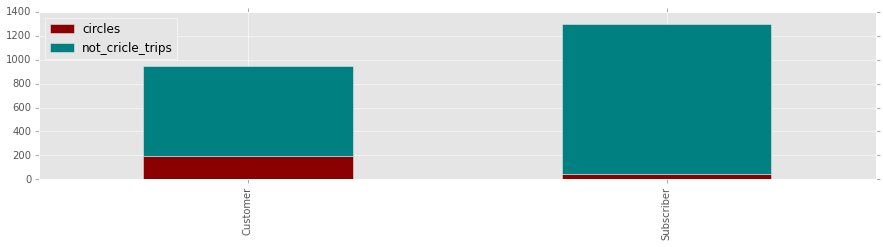

In [174]:
night[['circles', 'not_cricle_trips']].plot(kind='bar', stacked=True, color=['darkred', 'teal'])

In [179]:
trans_night = night[['circles', 'not_cricle_trips']].transpose()

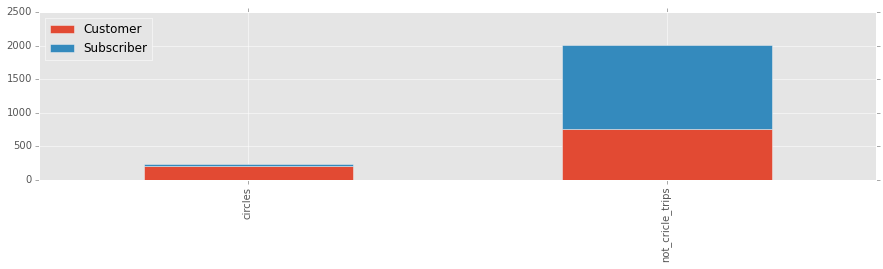

In [180]:
trans_night.plot(kind='bar', stacked=True)

# trips by distance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123309240>]], dtype=object)

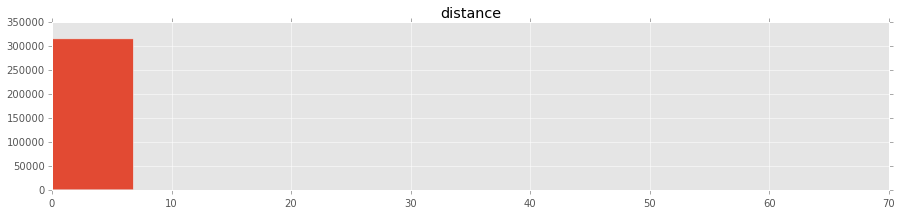

In [250]:
trip_df.hist('distance')

In [251]:
trip_df['distance'].describe()

count    315807.000000
mean          1.306595
std           0.845138
min           0.000000
25%           0.809550
50%           1.223833
75%           1.691105
max          68.023961
Name: distance, dtype: float64

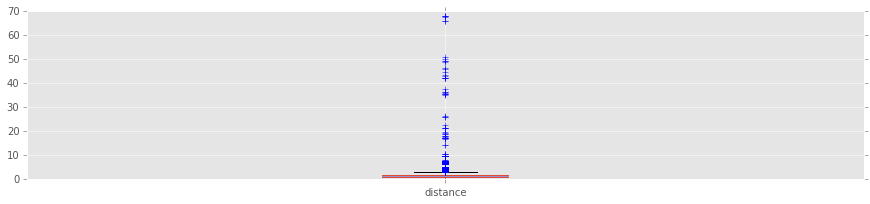

In [252]:
trip_df.boxplot(['distance'], return_type='axes')

In [257]:
trip_df['distance'].quantile(.9998)

9.5288986529597342

In [262]:
far_trips = trip_df[trip_df['distance']>trip_df['distance'].quantile(.9998)]

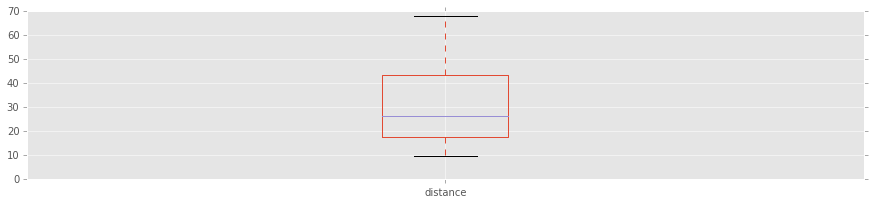

In [259]:
far_trips.boxplot(['distance'], return_type='axes')

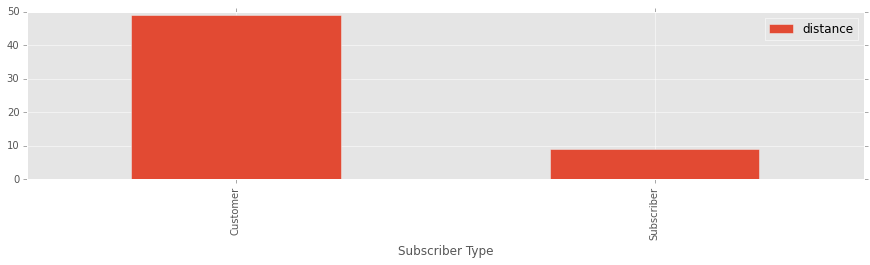

In [260]:
far_trips[['distance','Subscriber Type']].groupby('Subscriber Type').count().plot(kind='bar')

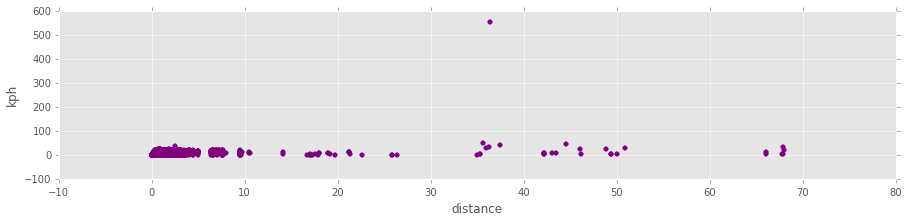

In [264]:
trip_df.plot(kind='scatter', x='distance', y='kph', color='purple')

In [265]:
trip_df = trip_df[trip_df['kph']<500]

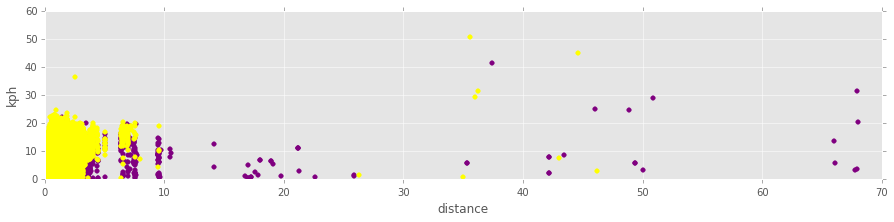

In [269]:
ax = trip_df[trip_df['Subscriber Type']=='Customer'].plot(kind='scatter', x='distance', y='kph', color='purple')
trip_df[trip_df['Subscriber Type']=='Subscriber'].plot(kind='scatter', x='distance', y='kph', color='yellow', ax=ax, xlim=(0,70), ylim=(0,60))